In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [21]:
y=[0, 0.,0.,1.875] # we have y[0]=x(t), y[1]=dx(t)/dt, y[2]=y(t), y[3]=dy(t)/dt
t=0

vy=1.5 # try different vy and provide a vymin and vymax

# def f(t, y, n=5):
#     f=np.zeros(4)
# #     r=np.sqrt(y[0]*y[0]+y[2]*y[2])
#     f[0]=y[1] #x
#     f[1]=1    #dx/dt
#     f[2]=y[3] #y
#     f[3]=(2*y[0]*y[3]-n*(n+1)*y[2])/(1-y[0]*y[0]) #dy/dt
# #     f[2]=y[3]
# #     f[3]=-G*M/r/r/r*y[2]
#     return f

def f(t, y, n=5):

    f=np.zeros(4)
    f[0]=t
    f[1]=y[1]+f[2]*f[0]
    f[2]=y[2]+f[3]*f[0] # z=dy/dx=y[3]
    f[3]=(2*y[0]*y[2]-n*(n+1)*y[1])/(1-y[0]*y[0])+y[3] #d^2y/dx^2=dz/dx
#     f[3]=(2*t*y[3]-n*(n+1)*y[2])/(1-t*t)
    return f

def rk4(t, h, y, n):
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*f(t,y)
    k2=h*f(t+0.5*h,y+0.5*k1)
    k3=h*f(t+0.5*h,y+0.5*k2)
    k4=h*f(t+h,y+k3)
    y+=(k1+2.*(k2+k3)+k4)/6.
    return y

def cd(t, h, y):
    y+=(f(t+h/2., y)-f(t-h/2.,y))/h/h
    return y

iter 0, shoot point: 2.0002000100003334, vy:6.667333366667918e-13 target: 1.0
iter 10, shoot point: 1.5006383375808166, vy:5.002127791936159e-13 target: 1.0
iter 20, shoot point: 1.5001504843850944, vy:5.000501614617086e-13 target: 1.0
iter 30, shoot point: 1.5001500079659578, vy:5.000500026553297e-13 target: 1.0
iter 40, shoot point: 1.5001500075007048, vy:5.000500025002454e-13 target: 1.0
iter 50, shoot point: 1.5001500075002505, vy:5.00050002500094e-13 target: 1.0
iter 60, shoot point: 1.50015000750025, vy:5.000500025000938e-13 target: 1.0
iter 70, shoot point: 1.50015000750025, vy:5.000500025000938e-13 target: 1.0
iter 80, shoot point: 1.50015000750025, vy:5.000500025000938e-13 target: 1.0
iter 90, shoot point: 1.50015000750025, vy:5.000500025000938e-13 target: 1.0
vy 1.5 time 0


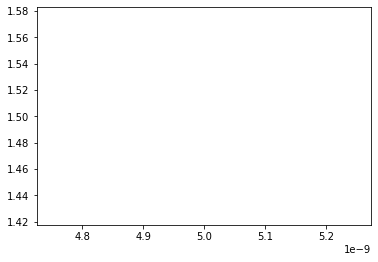

In [23]:
## Using Bisection method to get the correct launch speed


# G=6.67428e-8
# M=5.974e27
# day=24.*3600.

h=1.e-4
y=[0., 0.,0.,1.875]
target_x=1.
target_y=1.
t=0.
tend=30
eps=1.e-8
vy=[]
xp=[]
yp=[]
ta=[]
vymin=1.5
vymax=2.5
maxiter=100
for iter in range(maxiter):
    xp=[]
    yp=[]
    ta=[]
    vy=(vymin+vymax)/2. # Finds the midpoint between the vmin and vmax
    y=[0.,0.,vy,0.]
    t=0
    while(t<tend):
        y = rk4(t,h,y,2)
#         y = cd(t, h, y)
        xp=np.append(xp,y[0])
        yp=np.append(yp,y[2])
        ta=np.append(ta,t)
        if((y[0])<target_x):
            y[0]=y[0]-y[1]*y[2]/y[3]
#             print("While loop breaking")
            break
        t = t+h
    if(np.abs(y[2]-target_y)<eps):#Overshot the x-limit
        print("Iter loop breaking")
        break
    if y[2]<target_y:
#         vymax=vy
        vymin=vy
        #please choose vymax=vy or vymin=vy
    else:
#         vymin=vy#please choose vymax=vy or vymin=vy
        vymax=vy
    if iter%10==0: print(f"iter {iter}, shoot point: {y[2]}, vy:{y[3]} target: {target_y}")

print("vy",vy,"time",t)
plt.show()
plt.plot(xp,yp)
plt.show()